<a href="https://colab.research.google.com/github/gnbhub/gnbai20211/blob/master/week4/week4_baekbosung_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definition of AI, ML, DL


## 1) AI : techniques that enables computers to mimic human behavior
## 2) ML : Ability to learn without explicitly being programmed
## 3) DL : Extract patterns and classification

### ML보다 DL이 과정이 간소하다. (특징 추출 과정 DL은 알아서 진행)

### Subfields of ML
Supervised Learning vs Unsupervised Learning : 답안지의 유무 \\
Reinforcement Learning : 행동의 평가를 바탕으로 보상 최대화 \\
분류 : 예측할 값이 n개로 정해져있음
회귀 : 예측할 값이 실수값으로 나타남

# 2. Supervised Learning
기계학습 모델의 개요 \\
입력값에 대해 예측값과 참 값을 동일하게 하도록 파라메타를 바꿈. \\
오차함수 : 예측값과 참 값이 얼마나 다른가를 수치화 \\
대표적인 오차함수 : SSE \\
오차함수를 극소화 시키는 최적해를 구함(Optional sol) \\
OS = argminE(sol) = argmin SSE \\




## 2-1) 경사하강법
### 오차함수의 기울기가 감소하는 방향으로 이동시켜 극솟값에 수렴할 때 까지 반복하는 방법
### cf) 확률적 경사 하강법 : 입력데이터의 개수가 커지면 하나의 i를 임의로 뽑아 연산한다. -> 정확도 down 속도 up

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
file_path = "/content/data_lab1.txt"
col_name = ['x', 'y']
df = pd.read_csv(file_path, sep = ' ', names = col_name)

In [18]:
x_train = df['x'].values.reshape(-1, 1)
y_train = df['y'].values.reshape(-1, 1)

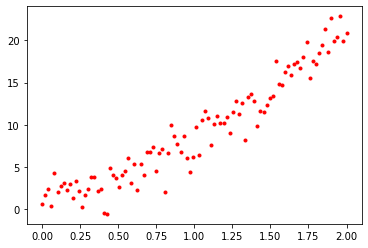

In [19]:
plt.plot(x_train, y_train, 'r.')

### Model

In [20]:
class LinearRegressor:
    
    def __init__(self, opt='bgd', lr=0.001):
        self.opt     = opt
        self.lr      = lr
        self.weight  = None
        self.history = []
    
    def fit(self, x, t, epochs=200, print_step=10):
        assert x.shape[0] == t.shape[0]
        assert len(x.shape) == 2
        
        self.num, self.dim = x.shape
        
        x = np.concatenate((np.ones((self.num, 1)), x), axis=1)
        self.weight = np.random.randn(self.dim+1)
        
        for epoch in range(1, epochs+1):
            y = self.forward(x)
            self.backward(x, y, t)            
            
            if epoch % print_step == 0:
                err = self.error(y, t)
                print(f'epoch: {epoch}  sse: {err}')
                self.history.append(err)
        
    
    def forward(self, x):
        y = [self.pred(xi) for xi in x]
        
        return np.array(y).reshape(-1, 1)
        
        
    def pred(self, xi):
        assert self.weight.shape == xi.shape
        
        return np.dot(self.weight, xi)
    
    
    def error(self, y, t):
        assert y.shape == t.shape
        
        return ((y - t)**2).sum() / 2
    
    
    def backward(self, x, y, t):
        
        if self.opt == 'bgd':
            for n in range(self.dim+1):
                g = 0.
                for i in range(self.num):
                    g += (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g
        
        elif self.opt == 'sgd':
            for n in range(self.dim+1):
                i = np.random.randint(self.num)
                g = (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g

##BGD

In [21]:
bgd = LinearRegressor(opt='bgd')

bgd.fit(x_train, y_train, epochs=200)

print('weight :', bgd.weight)

epoch: 10  sse: 590.0845457795504
epoch: 20  sse: 420.2382676098606
epoch: 30  sse: 355.9858063090147
epoch: 40  sse: 309.4721048107577
epoch: 50  sse: 275.4896682595532
epoch: 60  sse: 250.66018202402333
epoch: 70  sse: 232.51834153818345
epoch: 80  sse: 219.26287680434663
epoch: 90  sse: 209.57767725346997
epoch: 100  sse: 202.5011173422256
epoch: 110  sse: 197.3305785304674
epoch: 120  sse: 193.55268758639187
epoch: 130  sse: 190.79234470822396
epoch: 140  sse: 188.77548055892882
epoch: 150  sse: 187.30184442883626
epoch: 160  sse: 186.2251217131922
epoch: 170  sse: 185.43840660577214
epoch: 180  sse: 184.86358761918396
epoch: 190  sse: 184.44359203981114
epoch: 200  sse: 184.13671928367665
weight : [-0.70112463 10.02805506]


##SGD

In [22]:

sgd = LinearRegressor(opt='sgd')

sgd.fit(x_train, y_train, epochs=2000, print_step=100)

print('weight :', sgd.weight)

epoch: 100  sse: 4515.87399572328
epoch: 200  sse: 3247.9766871085953
epoch: 300  sse: 2134.868464605614
epoch: 400  sse: 1634.5117765101268
epoch: 500  sse: 1261.5531689427626
epoch: 600  sse: 960.9534742211783
epoch: 700  sse: 769.1727074460778
epoch: 800  sse: 667.8929851558768
epoch: 900  sse: 610.3993815934859
epoch: 1000  sse: 555.8333238744689
epoch: 1100  sse: 528.5277068501115
epoch: 1200  sse: 497.54053541375987
epoch: 1300  sse: 462.1213084584308
epoch: 1400  sse: 448.51337628395396
epoch: 1500  sse: 440.0823791944245
epoch: 1600  sse: 435.6632695442511
epoch: 1700  sse: 429.2648445431032
epoch: 1800  sse: 421.80924472755265
epoch: 1900  sse: 414.88239337431156
epoch: 2000  sse: 403.76148832061904
weight : [2.95563585 6.69163676]


##Plot Learning Curve

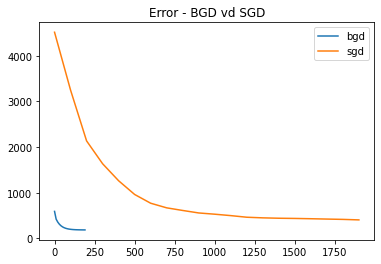

Final error
BGD : 184.13671928367665
SGD : 403.76148832061904


In [23]:
plt.plot(range(0, 200, 10), bgd.history, label='bgd')
plt.plot(range(0, 2000, 100), sgd.history, label='sgd')

plt.title('Error - BGD vd SGD')
plt.legend()
plt.show()

print('Final error')
print('BGD :', bgd.history[-1])
print('SGD :', sgd.history[-1])

##Plot result

In [24]:
def plot_line(w, x, label):
    y = [w[0] + w[1] * xi for xi in x]
    plt.plot(x, y, label=label)

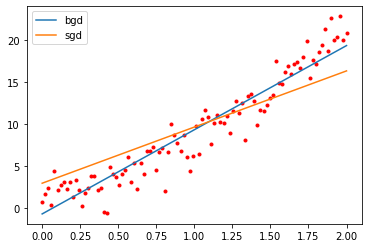

In [25]:
x = np.linspace(0, 2)

plt.plot(x_train, y_train, 'r.')
plot_line(bgd.weight, x, 'bgd')
plot_line(sgd.weight, x, 'sgd')

plt.legend()
plt.show()